In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
conda install pip

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\anaconda\Anaconda3

  added / updated specs:
    - pip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.10               |           py37_0         3.0 MB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                        4.7.5-py37_0 --> 4.7.10-py37_0




conda-4.7.10         | 3.0 MB    |            |   0% 
conda-4.7.10         | 3.0 MB    | 3          |   3% 
conda-4.7.10         | 3.0 MB    | 7          |   8% 
conda-4.7.10         | 3.0 MB    | #3         |  13% 
conda-4.7.10         | 3.0 MB    | ##1        |  21% 
conda-4.7.10         | 3.0 MB    | ##8        |  28% 
conda-4.7.10         | 3.0 MB    | ###3       |  33% 
conda-4.7.10  

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


In [4]:
pip install gym

  Using cached https://files.pythonhosted.org/packages/61/75/9e841bc2bc75128e0b65c3d5255d0bd16becb9d8f7120b965d41b8e70041/gym-0.14.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/1c/fc/dad5eaaab68f0c21e2f906a94ddb98175662cc5a654eee404d59554ce0fa/pyglet-1.3.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/f4/4a080c349c1680a2086196fcf0286a65931708156f39568ed7051e42ff6a/cloudpickle-1.2.1-py2.py3-none-any.whl
  Stored in directory: C:\Users\Gandharv Dalal\AppData\Local\pip\Cache\wheels\7e\53\f6\c0cd3c9bf953f35c0aee7fa62ea209371e92f5e5cced3245ba
Successfully built gym
  Found existing installation: cloudpickle 0.8.0
    Uninstalling cloudpickle-0.8.0:
      Successfully uninstalled cloudpickle-0.8.0
Note: you may need to restart the kernel to use updated packages.


spyder 3.3.3 requires pyqt5<=5.12; python_version >= "3", which is not installed.


In [2]:
import gym


In [3]:
env=gym.make("CartPole-v0") #make() function is used for creating the environment

In [4]:
obs=env.reset() # reset is used for initilsation

In [5]:
obs # as there are 4 floats 1.horizontal position
#2.velocity 3.angle of the pole 4.angular velocity

array([0.04753327, 0.01133169, 0.0122615 , 0.02734044])

In [6]:
img= env.render(mode="rgb_array")  ## to render image as numpy array

In [7]:
img.shape  #height weigth channels(3=Rgb)

(400, 600, 3)

In [8]:

from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


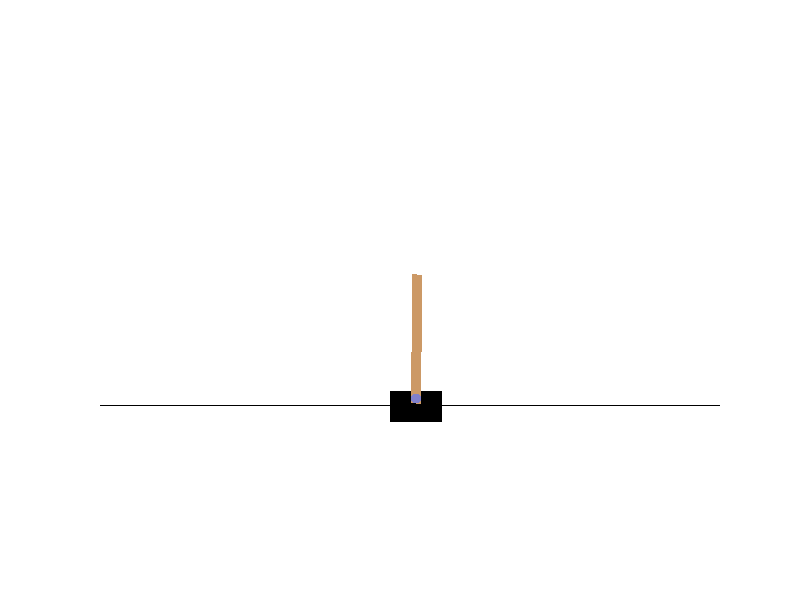

In [9]:
plot_cart_pole(env, obs)

## lets ask the environment what actions are possible

In [33]:
env.action_space #to know how many actions are possible

Discrete(2)

In [11]:
# 2-> left(0) and right(1)

# A simple hard-coded policy

In [29]:

def render_policy_net(model_path, action, X, n_max_steps = 1000):
    frames = []
    env = gym.make("CartPole-v0")
    obs = env.reset()
    with tf.Session() as sess:
        saver.restore(sess, model_path)
        for step in range(n_max_steps):
            img = render_cart_pole(env, obs)
            frames.append(img)
            action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
            obs, reward, done, info = env.step(action_val[0][0])
            if done:
                break
    env.close()
    return frames

In [12]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)

    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1

    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


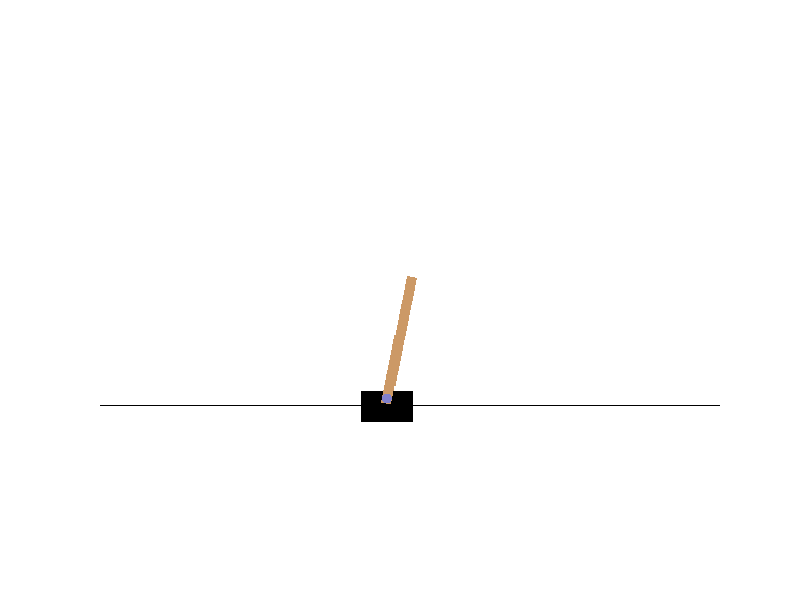

In [13]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,
def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)
video = plot_animation(frames)
plt.show()

## building the neural network policy using Tensorflow

In [14]:
import tensorflow as tf

In [15]:
#1.specify the neural network architecture
n_inputs=4 
n_hidden=4
n_outputs=1
initializer=tf.contrib.layers.variance_scaling_initializer()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [16]:
# 2. build the neural network
X=tf.placeholder(tf.float32,shape=[None,n_inputs])
hidden=tf.layers.dense(X,n_hidden,activation=tf.nn.elu,kernel_initializer=initializer)
logits=tf.layers.dense(hidden,n_outputs,activation=tf.nn.elu,kernel_initializer=initializer)
outputs=tf.nn.sigmoid(logits)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [17]:
#3. select a random action based on the estimated probabilties
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action=tf.multinomial(tf.log(p_left_and_right),num_samples=1)
init=tf.global_variables_initializer()

Instructions for updating:
Use tf.random.categorical instead.


In [18]:
y=1. -tf.to_float(action)

Instructions for updating:
Use tf.cast instead.


In [20]:
learning_rate=0.01 # target probabilities

## defining the cost function(cross entropy)
learning_rate=0.01
cross_entropy=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=logits)
optimizer=tf.train.AdadeltaOptimizer(learning_rate)
grads_and_vars=optimizer.compute_gradients(cross_entropy) #compute_gradients() method returns a list of gradient vector/variables
#pairs which we will use for tweaking the gradients

gradients=[grad for grad , variable in grads_and_vars]

# optimisation


In [22]:
gradient_placeholders = []
grads_and_vars_feed = []
for grad, variable in grads_and_vars:
    gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
    gradient_placeholders.append(gradient_placeholder)
    grads_and_vars_feed.append((gradient_placeholder, variable))
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]

In [24]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22., -40., -50.])

In [25]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [26]:
env = gym.make("CartPole-v0")

n_games_per_update = 10
n_max_steps = 1000
n_iterations = 250
save_iterations = 10
discount_rate = 0.95

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)})
                obs, reward, done, info = env.step(action_val[0][0])
                current_rewards.append(reward)
                current_gradients.append(gradients_val)
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)

        all_rewards = discount_and_normalize_rewards(all_rewards, discount_rate=discount_rate)
        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_rewards)
                                          for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
        sess.run(training_op, feed_dict=feed_dict)
        if iteration % save_iterations == 0:
            saver.save(sess, "./my_policy_net_pg.ckpt")

Iteration: 249

In [27]:

env.close()

INFO:tensorflow:Restoring parameters from ./my_policy_net_pg.ckpt


<IPython.core.display.Javascript object>


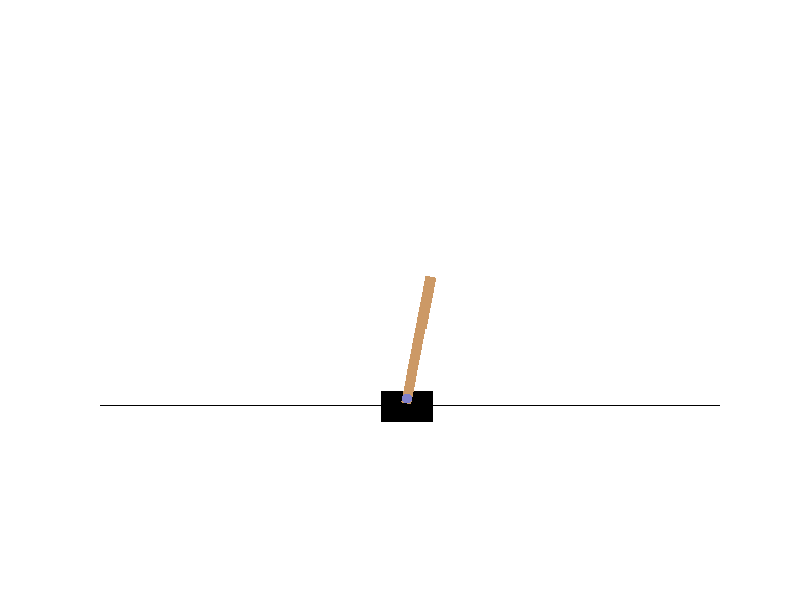

In [32]:
frames = render_policy_net("./my_policy_net_pg.ckpt", action, X, n_max_steps=1000)
video = plot_animation(frames)
plt.show()